# Практическое задание

Скиталинская Габриелла 192 и чо

### Задача Bike Sharing

Задача на kaggle: https://www.kaggle.com/c/bike-sharing-demand

По историческим данным о прокате велосипедов и погодных условиях необходимо спрогнозировтаь спрос на прокат велосипедов.

В исходной псотановке задачи доступно 9 признаков: https://www.kaggle.com/c/prudential-life-insurance-assessment/data

В наборе признаков присутсвуют вещественные, категориальные, и бинарные данные. 

### Анализ и визуализация данных

In [2]:
from sklearn import cross_validation, ensemble, grid_search, linear_model, metrics, pipeline, preprocessing

import numpy as np
import pandas as pd

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [54]:
data = pd.read_csv("bike_sharing_train.csv", na_values="NaN")

In [5]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


3 . Проанализируйте описание данных:

***datetime*** - hourly date + timestamp  

***season*** -  1 = spring, 2 = summer, 3 = fall, 4 = winter 

***holiday*** - whether the day is considered a holiday

***workingday*** - whether the day is neither a weekend nor holiday

***weather*** - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
    
***temp*** - temperature in Celsius

***atemp*** - "feels like" temperature in Celsius

***humidity*** - relative humidity

***windspeed*** - wind speed

***count*** - number of total rentals

Температура, погода, сезон

влажность, время наверное

In [55]:
def date_to_year(string):
    return int(string[0:4])

def date_to_month(string):
    return int(string[5:7])

def date_to_day(string):
    return int(string[8:10])
def date_to_hour(string):
    return int(string[11:13])

In [56]:
data['year']=data.datetime.map(date_to_year)
data['month']=data.datetime.map(date_to_month)
data['day']=data.datetime.map(date_to_day)
data['hour']=data.datetime.map(date_to_hour)
data.drop('datetime', axis=1, inplace=True)

In [57]:
features = data.columns.drop(["count"]).tolist()
answer = ["count"]

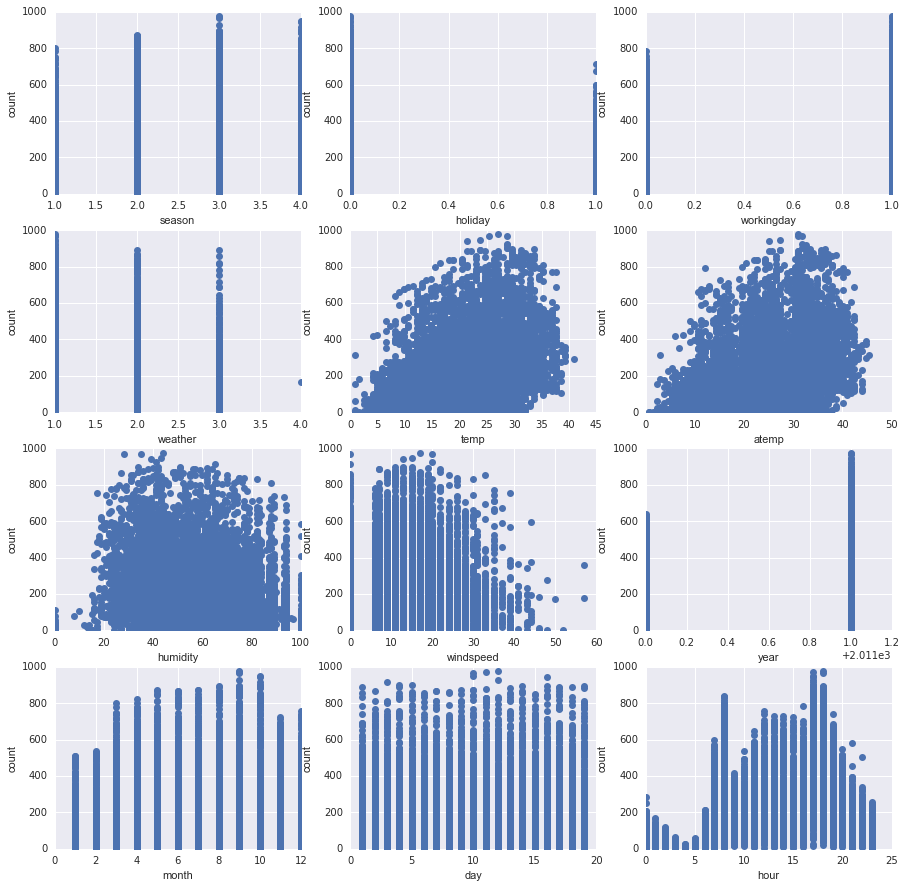

In [14]:
from matplotlib import pylab as plt

fig = plt.figure(figsize=(15,15))
for i in range(len(features)):
    plt.subplot(4, 3, i + 1,)
    plt.xlabel(features[i])
    plt.ylabel('count')
    plt.plot(data[features[i]], data[answer],'o')

В 2012 году. в рабочие дни. 

In [15]:
data.corrwith(data['count'])

season        0.163439
holiday      -0.005393
workingday    0.011594
weather      -0.128655
temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
count         1.000000
year          0.260403
month         0.166862
day           0.019826
hour          0.400601
dtype: float64

сильно коррелирующих признаков нет.

In [16]:
data.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.163439,-0.004797,0.971524,0.001729,-0.006546
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,-0.005393,0.012021,0.001731,-0.015877,-0.000354
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,0.011594,-0.002482,-0.003394,0.009829,0.002780
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.128655,-0.012548,0.012144,-0.007890,-0.022740
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.394454,0.061226,0.257589,0.015551,0.145430
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.389784,0.058540,0.264173,0.011866,0.140343
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.317371,-0.078606,0.204537,-0.011335,-0.278011
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.101369,-0.015221,-0.150192,0.036157,0.146631
count,0.163439,-0.005393,0.011594,-0.128655,0.394454,0.389784,-0.317371,0.101369,1.000000,0.260403,0.166862,0.019826,0.400601
year,-0.004797,0.012021,-0.002482,-0.012548,0.061226,0.058540,-0.078606,-0.015221,0.260403,1.000000,-0.004932,0.001800,-0.004234


Сильно коррелируют время года и месяц, температура и "ощущаемая" температура, что ужасно логично :D

In [21]:
print data.mean()
print data.std()


season           2.506614
holiday          0.028569
workingday       0.680875
weather          1.418427
temp            20.230860
atemp           23.655084
humidity        61.886460
windspeed       12.799395
count          191.574132
year          2011.501929
month            6.521495
day              9.992559
hour            11.541613
dtype: float64
season          1.116174
holiday         0.166599
workingday      0.466159
weather         0.633839
temp            7.791590
atemp           8.474601
humidity       19.245033
windspeed       8.164537
count         181.144454
year            0.500019
month           3.444373
day             5.476608
hour            6.915838
dtype: float64


Сильно отличается! ОПАСНОСТЬ!! в регрессии например будут учитываться только «крупномасштабные» признаки.

### Линейные модели

In [58]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder

X = data.drop('count', axis=1) 
y = data["count"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [32]:
from sklearn.preprocessing import StandardScaler

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [33]:
from sklearn.linear_model import SGDRegressor, Lasso
from sklearn.metrics import mean_absolute_error

sgd = SGDRegressor()
sgd.fit(X_train, y_train)

lasso = Lasso()
lasso.fit(X_train, y_train)

y_sgd = sgd.predict(X_test)
y_lasso = lasso.predict(X_test)

print (mean_absolute_error(y_train, sgd.predict(X_train)))
print (mean_absolute_error(y_train, lasso.predict(X_train)))
print (mean_absolute_error(y_test, y_sgd))
print (mean_absolute_error(y_test, y_lasso))

105.62956454
106.14196484
105.377294927
105.957239551


In [35]:
print "Для SGD"
zip(features, sgd.coef_)

Для SGD


[('season', -4.3234852848847876),
 ('holiday', -1.0843050811632033),
 ('workingday', -2.4293968261293211),
 ('weather', -4.5252169769611674),
 ('temp', 26.995685494849766),
 ('atemp', 28.04121308663796),
 ('humidity', -36.070230043883285),
 ('windspeed', 5.7905526570956951),
 ('year', 38.583861465040705),
 ('month', 27.455287803899463),
 ('day', -0.54867140961178829),
 ('hour', 53.531557743197425)]

In [36]:
print "для lasso"
zip(features, lasso.coef_)


для lasso


[('season', 0.0),
 ('holiday', -0.0),
 ('workingday', 0.0),
 ('weather', -3.2029766768859478),
 ('temp', 23.34974299122478),
 ('atemp', 28.434981034763496),
 ('humidity', -37.030895279894622),
 ('windspeed', 5.0198697629920153),
 ('year', 40.646049393266736),
 ('month', 24.960786653527038),
 ('day', 0.8754214200157896),
 ('hour', 53.056580355686016)]

Наибольший вклад внесли температуры, год, час.

In [38]:
data['newfeat_1'] = data['hour'] * data['workingday']
data['newfeat_2'] = data['season'] * data['weather']
data['newfeat_3'] = data['atemp'] - data['temp'] 

In [46]:
features = data.columns.drop(["count"]).tolist() 

In [47]:
X = data.drop('count', axis=1) 
y = data["count"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [48]:
sgd = SGDRegressor()
sgd.fit(X_train, y_train)

lasso = Lasso()
lasso.fit(X_train, y_train)

y_sgd = sgd.predict(X_test)
y_lasso = lasso.predict(X_test)

print (mean_absolute_error(y_train, sgd.predict(X_train)))
print (mean_absolute_error(y_train, lasso.predict(X_train)))
print (mean_absolute_error(y_test, y_sgd))
print (mean_absolute_error(y_test, y_lasso))

105.549473392
106.873066478
102.619306341
103.677241345


In [51]:
print "Для sgd "
zip(features, sgd.coef_)


Для sgd 


[('season', 8.0015715178122306),
 ('holiday', 0.86127254425419941),
 ('workingday', -8.9683564651056855),
 ('weather', 4.8038253112461033),
 ('temp', 25.677284647441581),
 ('atemp', 23.869999764163651),
 ('humidity', -35.101447214098435),
 ('windspeed', 4.1478659808552054),
 ('year', 39.832125137078393),
 ('month', 25.529803207643685),
 ('day', 0.78480970075271106),
 ('hour', 51.480937862136102),
 ('newfeat_1', 3.5985044904832448),
 ('newfeat_2', -14.851564950378695),
 ('newfeat_3', 1.4115175551983221)]

In [52]:
print "для lasso \n"
zip(features, lasso.coef_)

для lasso 



[('season', 0.0),
 ('holiday', -0.094546541830423381),
 ('workingday', -0.0),
 ('weather', -0.0),
 ('temp', 15.839826213281972),
 ('atemp', 35.98946008793822),
 ('humidity', -38.313689441188892),
 ('windspeed', 4.3641598916916227),
 ('year', 40.613858433488353),
 ('month', 27.380331917507629),
 ('day', 0.0),
 ('hour', 52.278562266797501),
 ('newfeat_1', 1.6202981090315989),
 ('newfeat_2', -4.103794911005366),
 ('newfeat_3', 0.0)]

Существенных изменнеий вроде нет. Качество не улучшилось((

In [59]:
# Пример:
# train_data, train_labels - DataFrame с обучающей выборкой и значения целевой функции на обучении
# test_data, test_labels - DataFrame с тестовой выборкой и значения целевой функции на тесте

# Создание индекса для бинарных признаков
binary_data_columns = ['holiday', 'workingday']
binary_data_indices = np.array([(column in binary_data_columns) for column in X_train.columns], dtype = bool)

# Создание индекса для вещественных признаков
numeric_data_columns = ['temp', 'atemp', 'humidity', 'windspeed', 'season', 'weather']
numeric_data_indices = np.array([(column in numeric_data_columns) for column in X_train.columns], dtype = bool)

# Создание модели регресии
model = linear_model.SGDRegressor(random_state = 0)

# Объявление pipline -  цепочки преобразования данных, начиная от обработки данных в зависимости от их типа, и 
# заканчивая обучением модели. 

estimator = pipeline.Pipeline(steps = [       
    ('feature_processing', pipeline.FeatureUnion(transformer_list = [        
            #binary
            ('binary_variables_processing', preprocessing.FunctionTransformer(lambda data: data[:, binary_data_indices])), 
                    
            #numeric
            ('numeric_variables_processing', pipeline.Pipeline(steps = [
                ('selecting', preprocessing.FunctionTransformer(lambda data: data[:, numeric_data_indices])),
                ('scaling', preprocessing.StandardScaler())            
                        ])),

        ])),
    ('model_fitting', model)
    ]
)

# С цепочкой можно работать как с одиночным преобразованием, в частности вызывать методы fit и predict 
estimator.fit(X_train, y_train)
metrics.mean_absolute_error(y_test, estimator.predict(X_test))

114.15619911171525

In [60]:
# Создание индекса для бинарных признаков
binary_data_columns = ['holiday', 'workingday']
binary_data_indices = np.array([(column in binary_data_columns) for column in X_train.columns], dtype = bool)

# Создание индекса для вещественных признаков
numeric_data_columns = ['temp', 'atemp', 'humidity', 'windspeed']
numeric_data_indices = np.array([(column in numeric_data_columns) for column in X_train.columns], dtype = bool)

# Создание индекса для категориальных признаков
categorical_data_columns = ['year', 'month', 'day', 'hour', 'season', 'weather']
categorical_data_indices = np.array([(column in categorical_data_columns) for column in X_train.columns], dtype = bool)

# Создание модели регресии
model = linear_model.SGDRegressor(random_state = 0)

# Объявление pipline -  цепочки преобразования данных, начиная от обработки данных в зависимости от их типа, и 
# заканчивая обучением модели. 

estimator = pipeline.Pipeline(steps = [       
    ('feature_processing', pipeline.FeatureUnion(transformer_list = [        
            #binary
            ('binary_variables_processing', preprocessing.FunctionTransformer(lambda data: data[:, binary_data_indices])), 
                    
            #numeric
            ('numeric_variables_processing', pipeline.Pipeline(steps = [
                ('selecting', preprocessing.FunctionTransformer(lambda data: data[:, numeric_data_indices])),
                ('scaling', preprocessing.StandardScaler())            
                        ])),
            #categorical
            ('categorical_variables_processing', pipeline.Pipeline(steps = [
                ('selecting', preprocessing.FunctionTransformer(lambda data: data[:, categorical_data_indices])),
                ('encoding', preprocessing.OneHotEncoder(handle_unknown='ignore'))
                            ]))
    

        ])),
    ('model_fitting', model)
    ]
)

# С цепочкой можно работать как с одиночным преобразованием, в частности вызывать методы fit и predict 
estimator.fit(X_train, y_train)
metrics.mean_absolute_error(y_test, estimator.predict(X_test))

76.194914849891816

Качество улучшилось. но не прям "ВАУ"

In [66]:
estimator.get_params().keys()

parameters_grid = { 
    'model_fitting__loss' : ['huber',  'epsilon_insensitive', 'squared_loss', ],
    'model_fitting__n_iter' :[3,5,10,50],
    'model_fitting__penalty' : ['l1', 'l2', 'none'],
    'model_fitting__alpha' : [0.0001, 0.01],
    'feature_processing__numeric_variables_processing__scaling__with_mean' : [0., 0.5]
}

grid_cv = grid_search.GridSearchCV(estimator, parameters_grid, 
                                   scoring='mean_absolute_error', cv=4)

grid_cv.fit(X_train, y_train)

GridSearchCV(cv=4, error_score='raise',
       estimator=Pipeline(steps=[('feature_processing', FeatureUnion(n_jobs=1,
       transformer_list=[('binary_variables_processing', FunctionTransformer(accept_sparse=False,
          func=<function <lambda> at 0x1249ed230>, pass_y=False,
          validate=True)), ('numeric_variables_processing', Pipeline(steps=[('select...r=5, penalty='l2', power_t=0.25,
       random_state=0, shuffle=True, verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'feature_processing__numeric_variables_processing__scaling__with_mean': [0.0, 0.5], 'model_fitting__penalty': ['l1', 'l2', 'none'], 'model_fitting__n_iter': [3, 5, 10, 50], 'model_fitting__alpha': [0.0001, 0.01], 'model_fitting__loss': ['huber', 'epsilon_insensitive', 'squared_loss']},
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_absolute_error',
       verbose=0)

In [67]:
print grid_cv.best_score_
print grid_cv.best_params_

-74.8187410311
{'model_fitting__penalty': 'l1', 'model_fitting__alpha': 0.01, 'feature_processing__numeric_variables_processing__scaling__with_mean': 0.0, 'model_fitting__n_iter': 50, 'model_fitting__loss': 'squared_loss'}


Качество улучшено

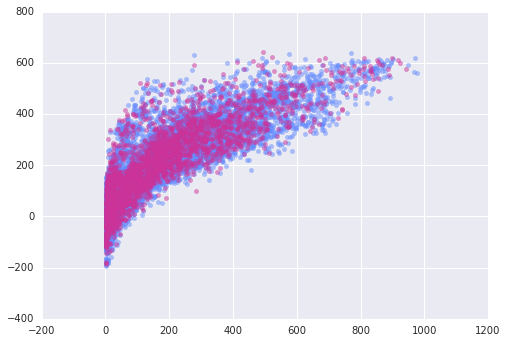

In [71]:
test_pred = grid_cv.best_estimator_.predict(X_test)

pylab.figure()
pylab.grid(True)
pylab.scatter(y_train, grid_cv.best_estimator_.predict(X_train), alpha=0.5, color= '#668cff')
pylab.scatter(y_test, grid_cv.best_estimator_.predict(X_test), alpha=0.5, color= '#cc3399')

Не очень модель у нас. 

### Случайный лес

In [73]:
regressor = ensemble.RandomForestRegressor()

estimator = pipeline.Pipeline(steps = [       
    ('feature_processing', pipeline.FeatureUnion(transformer_list = [        
            #binary
            ('binary_variables_processing', preprocessing.FunctionTransformer(lambda data: data[:, binary_data_indices])), 
                    
            #numeric
            ('numeric_variables_processing', pipeline.Pipeline(steps = [
                ('selecting', preprocessing.FunctionTransformer(lambda data: data[:, numeric_data_indices])),
                ('scaling', preprocessing.StandardScaler())            
                        ])),
            #categorical
            ('categorical_variables_processing', pipeline.Pipeline(steps = [
                ('selecting', preprocessing.FunctionTransformer(lambda data: data[:, categorical_data_indices])),
                ('encoding', preprocessing.OneHotEncoder(handle_unknown='ignore'))
                            ]))
    

        ])),
    ('model_fitting', regressor)
    ]
)

estimator.fit(X_train, y_train)
metrics.mean_absolute_error(y_test, estimator.predict(X_test))

35.454371785451876

Качество в два раза лучше.

In [80]:
importances = regressor.feature_importances_
print(importances)
std = np.std([tree.feature_importances_ for tree in regressor.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

[ 0.00138302  0.07996783  0.03094994  0.16796829  0.08099546  0.01877753
  0.01789465  0.00212704  0.00092819  0.00833275  0.00400776  0.00249861
  0.00455805  0.04222059  0.03656984  0.00120872  0.00108691  0.00106201
  0.00325345  0.00129041  0.00164294  0.00297878  0.00063997  0.00224285
  0.00544414  0.00276162  0.00039112  0.00356612  0.00209242  0.0016141
  0.00184626  0.00112902  0.00346989  0.00166589  0.00113642  0.00111253
  0.00260368  0.00217915  0.00155096  0.00164266  0.00162479  0.00162063
  0.00178559  0.00095846  0.00135264  0.00077522  0.01165343  0.0122133
  0.01437845  0.01185679  0.0147562   0.0137374   0.00640733  0.00994041
  0.04536266  0.00840438  0.00357035  0.0028015   0.00322426  0.00515998
  0.00250445  0.00723746  0.02155435  0.11428752  0.08395085  0.026047
  0.00785887  0.00364246  0.00512507  0.00741661]
Feature ranking:
1. feature 3 (0.167968)
2. feature 63 (0.114288)
3. feature 64 (0.083951)
4. feature 4 (0.080995)
5. feature 1 (0.079968)
6. feature 5

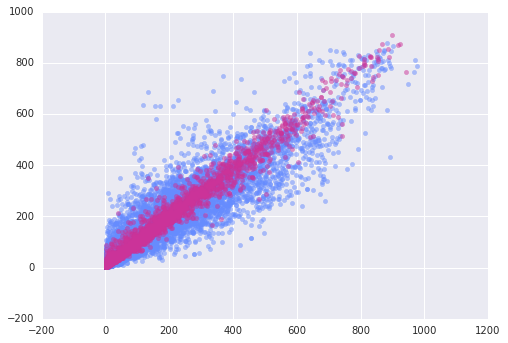

In [82]:
test_pred = grid_cv.best_estimator_.predict(X_test)

pylab.figure()
pylab.grid(True)
pylab.scatter(y_train, estimator.predict(X_train), alpha=0.5, color= '#668cff')
pylab.scatter(y_test, estimator.predict(X_test), alpha=0.5, color= '#cc3399')

Уже симпатичнее, похоже на диагональ.

### Опциональная часть

Попробуйте улучшить результат, полученный на предыдущих шагах. В этом разделе можно и нужно пользоваться любыми изученными алгоритмами, инструментами и всем, чем вам захочется.

### Заключение

В этом разделе Вы можете написать, какие выводы Вы сделали в процессе работы над заданием, понравилось ли оно Вам, а также всё, что Вы о задании думаете =)